In [1]:
#script to compute cross sections of density, and tends of T&S -- start with Density
import numpy as np
import time
import xarray
import glob
import matplotlib.animation as animation

%pylab inline
pylab.rcParams['figure.figsize'] = (8,8) # Large fgures
pylab.rcParams['image.cmap'] = 'seismic'
dpi=200;

### axis_font = {'fontname':'Arial', 'size':'18'}    
title_font = {'fontname':'Arial', 'size':'32', 'color':'black', 'weight':'normal'}
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)

Populating the interactive namespace from numpy and matplotlib


In [2]:
me = xarray.open_dataset('/lcrc/group/e3sm/public_html/inputdata/ocn/mpas-o/EC30to60E2r2/ocean.EC30to60E2r2.200908.nc')

In [12]:
flist = sorted(glob.glob('/lcrc/group/e3sm/ac.vanroekel/scratch/anvil/20211025_EC30to60E2r2_JRA_newGM/run/*mpaso.hist.am.timeSeriesStatsMonthly.*'))

In [13]:
#open 1 file for the lat bins and load the refBotDepth
bd = me.refBottomDepth.values
ds = xarray.open_dataset(flist[0])
lats = ds.binBoundaryMocStreamfunction.values*180./np.pi
ind = abs(lats-26.5).argmin()


In [15]:
nz = len(bd)
nt = len(flist)
AMOC = np.zeros((nt,nz))
for i in range(nt):
    ds = xarray.open_dataset(flist[i])
    AMOC[i,:] = ds.timeMonthly_avg_mocStreamvalLatAndDepthRegion[0,0,:,ind].values
    ds.close()

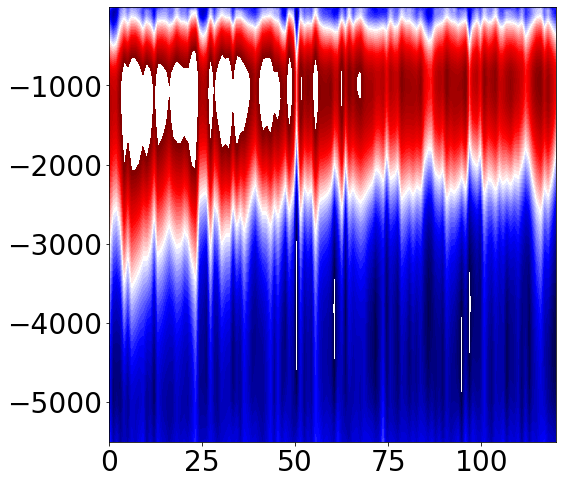

In [22]:
plt.contourf(np.linspace(0,nt,nt),-bd,((AMOC)).T,np.linspace(-6,15))

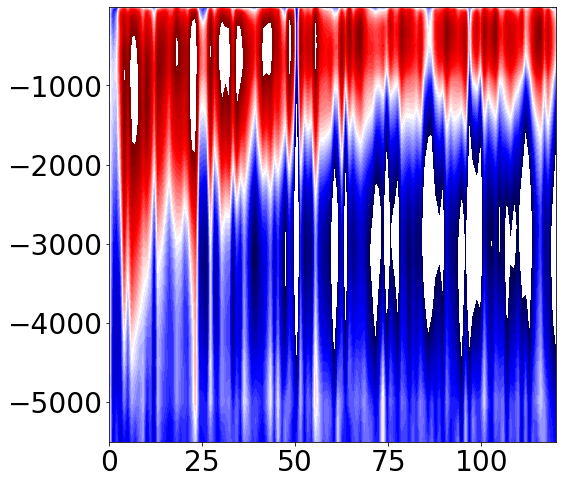

In [23]:
plt.contourf(np.linspace(0,nt,nt),-bd,(AMOC - AMOC[0,:]).T,np.linspace(-6,6))